Consider the 2D system of ODEs
\begin{gather*}
\frac{dx}{dt}=x\Big(3-x-2y\Big) \\
\frac{dy}{dt}=y\Big(2-x-y\Big)
\end{gather*}

This is a specific case of the classic Lotka-Volterra model of competition between two species. This model is used to model two species competing for the same limited food supply. Here, other complicating ecological features such as predators and weather are ignored. There are two main effects to consider:
1. Each species would grow to its carrying capacity in the absence of the other. 
2. When the two species encounter each other the conflict reduces the growth rate for each species.

The above model is typical with these assumptions where $x(t),\ y(t),\ x,y \geq 0 $ represent the populations of each species. 

Let us consider the following ...
1. Plot the solutions $x(t),y(t)$
2. Find the equilibrium solutions (fixed points) and discuss their local stability. 
3. Plot the phase portrait


# (1) Plotting Solutions

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def model(u,t): #defining model function
    x,y = u
    dudt=[x*(3-x-2*y),y*(2-x-y)]
    return dudt

In [7]:
t=np.linspace(0,100,1001) #create solution space (start, end, steps)
x=10.0 
y=5.0
u0=[x,y] #initial condition
soln=odeint(model,u0,t) #calculating solution
xsol=soln[:, 0] # define x solution
ysol=soln[:, 1] # define y solution

In [8]:
print(t[0:51])

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5. ]


In [9]:
print(type(soln),soln.shape)

<class 'numpy.ndarray'> (1001, 2)


In [10]:
print(soln)

[[ 1.00000000e+01  5.00000000e+00]
 [ 3.84262888e+00  2.42530857e+00]
 [ 2.53112984e+00  1.77438810e+00]
 ...
 [ 3.00000000e+00 -1.53883456e-13]
 [ 3.00000000e+00 -1.53821233e-13]
 [ 3.00000000e+00 -1.53759010e-13]]


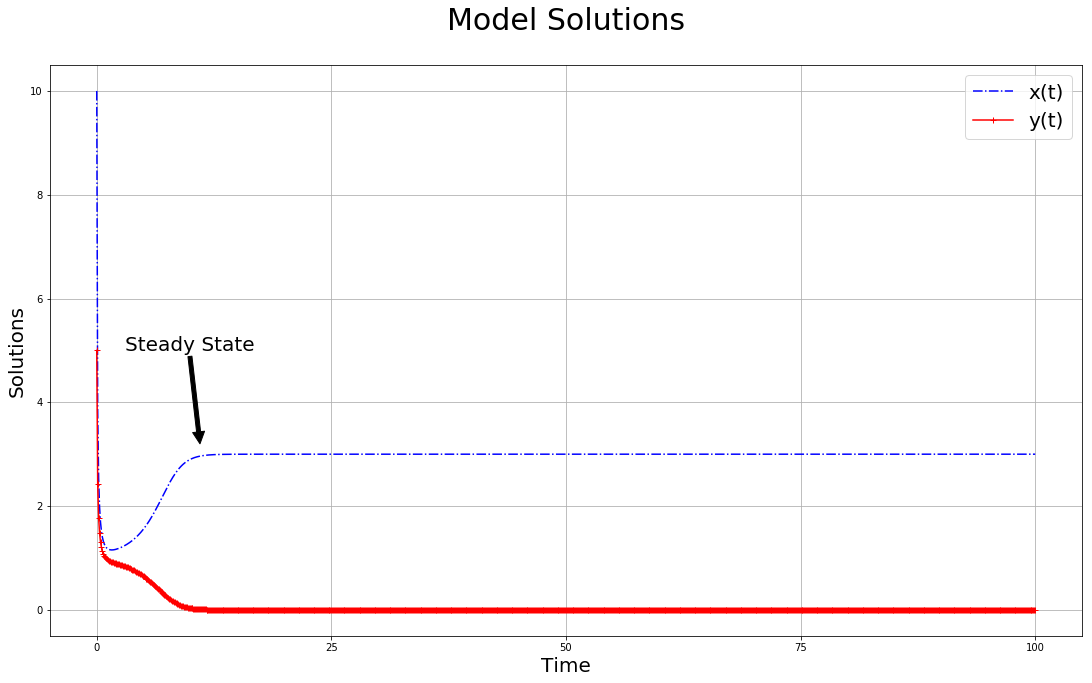

In [11]:
plt.plot(t,xsol,'b',label='x(t)',linestyle='-.') #plot x solution
plt.plot(t,ysol,'r',label="y(t)",marker='+') # plot y solution
plt.legend(loc='best',fontsize=20) # plot legend
plt.xlabel('Time',fontsize=20) # x axis label
plt.ylabel('Solutions',fontsize=20) #y axis label
plt.grid() # plot gridlines
plt.yticks() #y axis tick labels
plt.xticks((0,25,50,75,100)) #x axis tick labels
fig = plt.gcf() #Get the current figure
fig.set_size_inches(18.5, 10.5) #resize figure
plt.title('Model Solutions' ,pad=35,fontsize=30) #Title 
plt.annotate('Steady State', xy=(11, 3.2), xytext=(3, 5), arrowprops=dict(facecolor='black'),fontsize=20)
#plt.savefig('COUGPY-FOLDER/plot1.png') #how to save figure into local folder
plt.show()

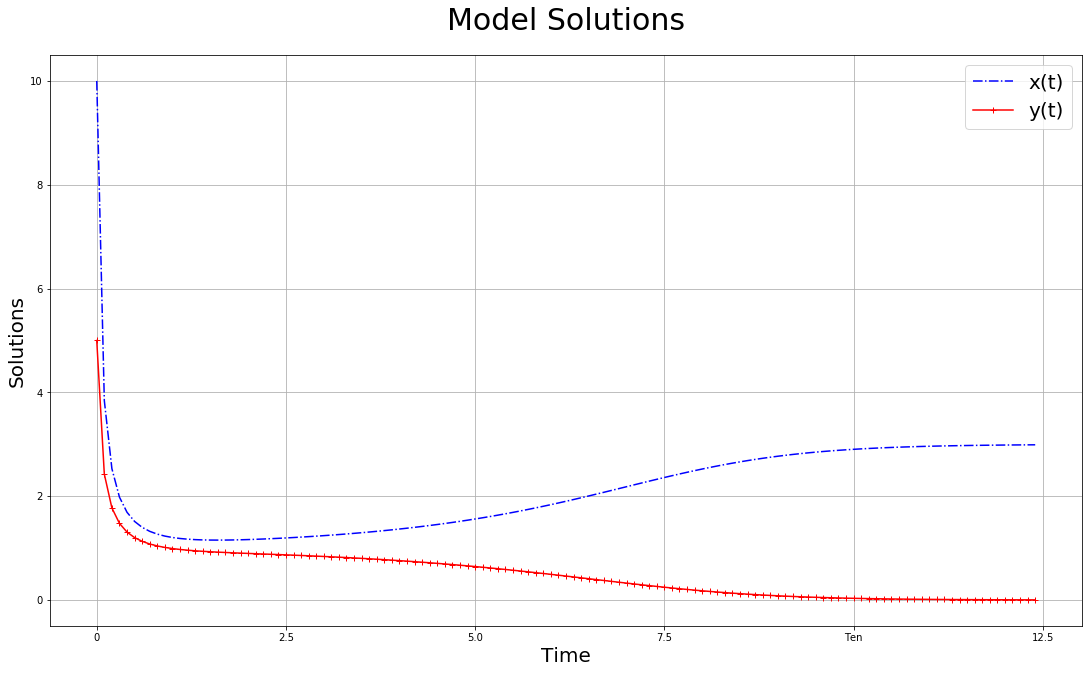

In [12]:
plt.plot(xsol[0:125],'b',label='x(t)',linestyle='-.') #plot x solution
plt.plot(ysol[0:125],'r',label="y(t)",marker='+') # plot y solution
plt.legend(loc='best',fontsize=20) # plot legend
plt.xlabel('Time',fontsize=20) # x axis label
plt.ylabel('Solutions',fontsize=20) #y axis label
plt.grid() # plot gridlines
plt.yticks() #y axis tick labels
plt.xticks((0,25,50,75,100,125),[0,2.5,10/2,7.5,'Ten',12.5]) #x axis tick labels
fig = plt.gcf() #Get the current figure
fig.set_size_inches(18.5, 10.5) #resize figure
plt.title('Model Solutions' ,pad=25,fontsize=30) #Title 
#plt.savefig('path/filename.png') #how to save figure into local folder
plt.show()

# (2) Numerically finding equilibrium points

In [13]:
import sympy as sym
sym.init_printing() #make answer pretty

x,y = sym.symbols('x,y') #define x,y as symbols to work with in sympy
f = sym.Eq(x*(3-x-2*y),0) #define f=x(3-x-2y)=0
g = sym.Eq(y*(2-x-y),0) #likewise as above

z=sym.solve([f,g],(x,y)) #solve system f,g for (x,y)
print(z)

[(0, 0), (0, 2), (1, 1), (3, 0)]


# Determining Stability


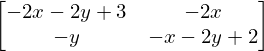

In [14]:
from sympy import Matrix
x,y = sym.symbols('x,y')
X = Matrix([x*(3-x-2*y),y*(2-x-y)]) # define vector of functions
Y = Matrix([x,y]) #vector of variables

M=X.jacobian(Y) #[dx'/dx,dx'/dy],[dy'/dx,dy'/dy]
M


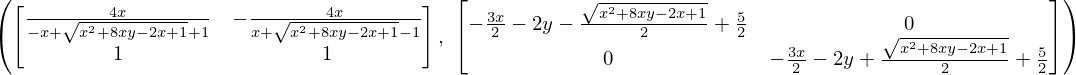

In [15]:
M.diagonalize() # returns (P,D), where D is diagonal and  𝑀=𝑃𝐷𝑃^(-1)

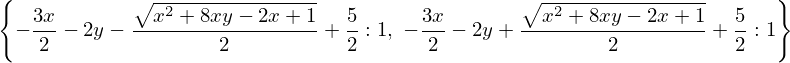

In [16]:
M.eigenvals() #returns eigenvalues of M, with multiplicity

In [17]:
from sympy.utilities.lambdify import lambdify # turn sympy expression into lambda function

p=M.eigenvals()  
f=[0,0]
i=0
for k, v in p.items(): # places eigenvalue functions into an array called f
    f[i]=k
    i=i+1
print(f)


[-3*x/2 - 2*y - sqrt(x**2 + 8*x*y - 2*x + 1)/2 + 5/2, -3*x/2 - 2*y + sqrt(x**2 + 8*x*y - 2*x + 1)/2 + 5/2]


In [18]:
g1=lambdify((x,y),f[0]) #transforms the sympy expressions into lambda functions (numerical) 
g2=lambdify((x,y),f[1])

In [19]:
eqpt={} #A dictionary is a collection which is unordered, changeable and indexed
#finding stability of eq points
for i in range(0,len(z)):
    e1=float(z[i][0])
    e2=float(z[i][1])
    v1=g1(e1,e2)
    v2=g2(e1,e2)
    if v1*v2<0:
        eq="saddle"
    else:
            if v1<0:
                eq="stable"
            else:
                eq="unstable"
    eqpt[i]=(z[i],v1,v2,eq) #store info into dictionary
    print(eqpt[i])

((0, 0), 2.0, 3.0, 'unstable')
((0, 2), -2.0, -1.0, 'stable')
((1, 1), -2.414213562373095, 0.4142135623730949, 'saddle')
((3, 0), -3.0, -1.0, 'stable')


In [21]:
import scipy.linalg as la # import scipy's linear algebra package
B=np.zeros(2) #array of 2 zeros
C=np.ones(2) # array of 2 ones
A=np.random.rand(2,2) #2x2 matrix of random numbers from [0,1)
print("EigenValues of A \n",la.eigvals(A)) #prints eigenvalues of A
print("Solves Ax=B \n x= ", la.solve(A,B)) # Solves A*x=B for x
D=np.matrix.transpose(A) #D is Transpose of A using numpy matrix computation
print("A \n",A,"\n")
print("A transpose \n",D)
E=np.matmul(C,A) # E is matrix product of D and A using numpy matrix multiplication
print(E)

EigenValues of A 
 [1.19094609+0.j 0.56992913+0.j]
Solves Ax=B 
 x=  [0. 0.]
A 
 [[0.9035765  0.21551547]
 [0.44488735 0.85729873]] 

A transpose 
 [[0.9035765  0.44488735]
 [0.21551547 0.85729873]]
[1.34846385 1.0728142 ]


# (3) Phase Potraits

In [22]:
def F1(x,y):
    return x*(3-x-2*y)
def F2(x,y):
    return y*(2-x-y)


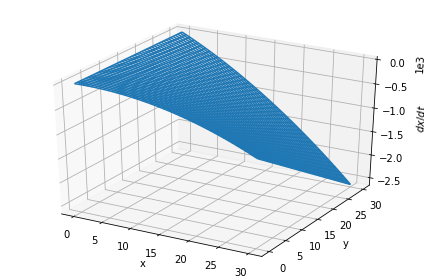

In [23]:
from mpl_toolkits import mplot3d   # constructing a 3d plot 

x = np.linspace(0, 30, 301) #define x,y axis
y = np.linspace(0, 30, 301)

X, Y = np.meshgrid(x, y) #create mesh over x,y
Z1 = F1(X, Y) # assign F1 - dx/dt function to Z1
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z1, cmap='PuBu') #actual plot command, 100 is number of contour lines
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('\n $dx/dt$')
plt.tight_layout() #clean up white space
ax.ticklabel_format(style='sci', axis='z',scilimits=(0,0)) #make z axis values in sci-tif notation
plt.show()

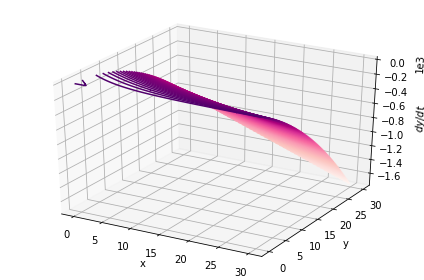

In [24]:
from mpl_toolkits import mplot3d # constructing a 3d plot 

x = np.linspace(0, 30, 301)
y = np.linspace(0, 30, 301)

X, Y = np.meshgrid(x, y)
Z2 = F2(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z2, 100, cmap='RdPu')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('\n $dy/dt$')
plt.tight_layout()
ax.ticklabel_format(style='sci', axis='z',scilimits=(0,0))
plt.show()

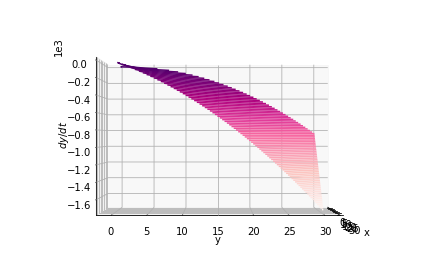

In [25]:
ax.view_init(0, 0) #Set the elevation and azimuth of the axes;
# ‘elev’ stores the elevation angle in the z plane. ‘azim’ stores the azimuth angle in the x,y plane.
ax.ticklabel_format(style='sci', axis='z',scilimits=(0,0))
fig

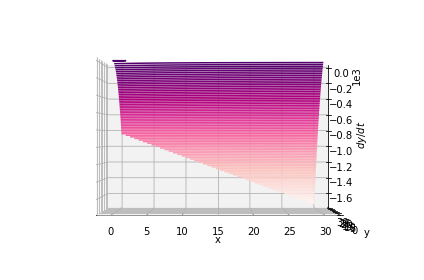

In [26]:
ax.view_init(0,-90)
ax.ticklabel_format(style='sci', axis='z',scilimits=(0,0))
fig

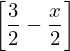

In [27]:
#Finding Nullclines
from sympy.solvers import solve
x, y  = sym.symbols('x y')
solve(x*(3-x-2*y),y)

In [28]:
#Finding Nullclines
y*(2-x-y)
from sympy.solvers import solve
x, y  = sym.symbols('x y')
solve(y*(2-x-y),y)

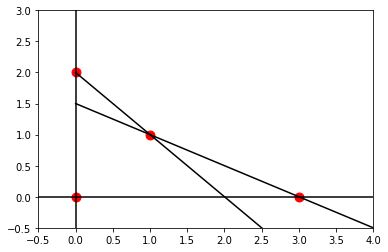

[(0, 0), (0, 2), (1, 1), (3, 0)]


In [29]:
x=np.linspace(0,6,601)
plt.plot(x,3/2-x/2,'k') #plot nullclines 
plt.plot(x,2-x,'k')
plt.axvline(0,c='k') #plot y axis
plt.axhline(0,c='k') #plot x axis
x=[0,0,1,3]
y=[0,2,1,0]
plt.xlim([-1/2, 4]) #set x axis limits
plt.ylim([-1/2, 3]) #set y axis limits
plt.scatter(x,y,c='r',s=80) #create scatter plot of (x,y) plots above, color red, size 80
plt.show()
print(z) #print eigenvalues from before

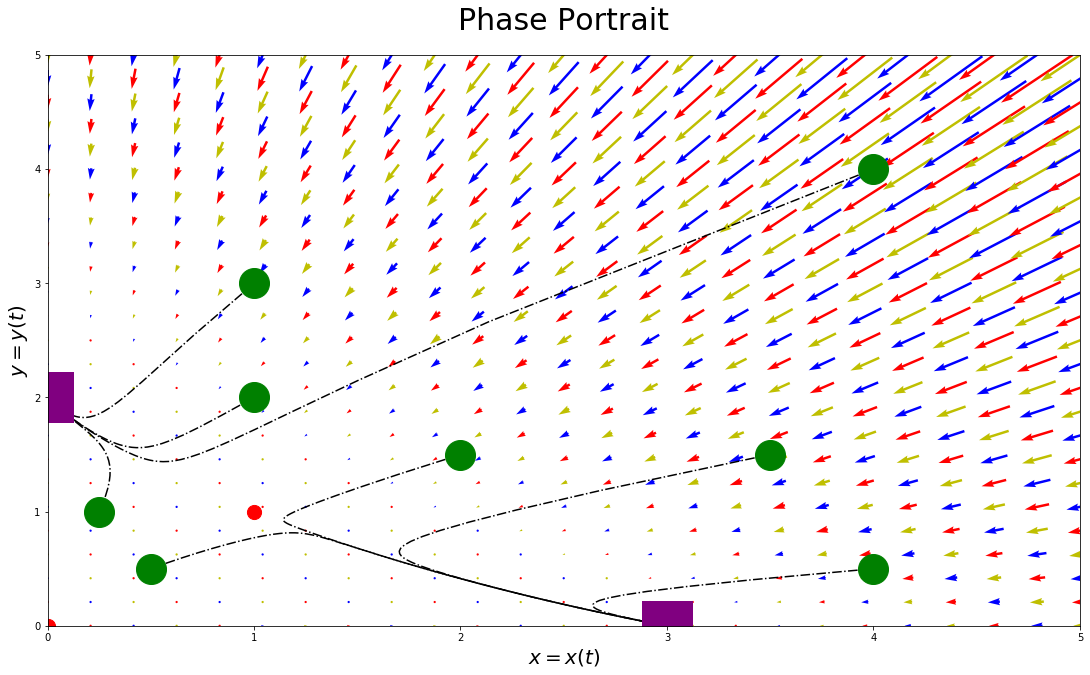

((0, 0), 2.0, 3.0, 'unstable')
((0, 2), -2.0, -1.0, 'stable')
((1, 1), -2.414213562373095, 0.4142135623730949, 'saddle')
((3, 0), -3.0, -1.0, 'stable')


In [30]:
#Let us plot a few solutions on the vector field.
#We will consider the solutions where x(0)=[1,2,3,4,5], and values of y(0) = 3.0


y1 = np.linspace(0, 5.0, 25)
y2 = np.linspace(0, 5.0, 25)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = model([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]


Q = plt.quiver(Y1, Y2, u, v, color=('y','r','b'),pivot='middle') #2d plot of arrows



for y in ([1.0,3.0],[.5,.5],[4,.5],[4,4],[2,1.5],[.25,1],[1,2],[3.5,1.5]):  #plotting some trajectories
    tspan = np.linspace(0, 60, 601) #timespan of solutions
    y0 = y #initial values
    ys = odeint(model, y0, tspan) #find solution given initial point
    plt.plot(ys[:,0], ys[:,1], 'k-.') # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o', color='green',markersize=30) # start point, circle
    plt.plot([ys[-1,0]], [ys[-1,1]], 's',color='purple',markersize=50) # end point, square 

plt.xlabel('$x=x(t)$',fontsize=20) #y1
plt.ylabel('$y=y(t)$',fontsize=20) #y2
plt.xlim([0, 5])
plt.ylim([0, 5])
fig = plt.gcf() #Get the current figure
fig.set_size_inches(18.5, 10.5) #resize figure
plt.title('Phase Portrait' ,pad=25,fontsize=30) #Title 
x=[0,0,1,3]
y=[0,2,1,0]
plt.scatter(x,y,c='r',s=200) #plot eq points
plt.show()
for i in range(0,len(eqpt)):
    print(eqpt[i])